In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
# Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
# Importing Dataset 
df = pd.read_csv('bank .csv')
df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1492,34,technician,married,tertiary,no,5060,yes,no,cellular,21,aug,12,21,-1,0,unknown,no
916,36,blue-collar,married,secondary,no,13,no,no,unknown,3,jun,284,1,-1,0,unknown,no
2734,52,services,married,secondary,no,2072,no,no,cellular,10,jul,224,1,-1,0,unknown,no
3791,56,services,married,secondary,no,22196,yes,no,cellular,21,nov,189,1,-1,0,unknown,no
1893,35,technician,divorced,secondary,no,69,yes,no,unknown,8,may,461,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,34,blue-collar,married,secondary,no,622,yes,no,unknown,21,may,145,1,-1,0,unknown,no
665,54,technician,married,secondary,no,0,no,no,telephone,16,nov,986,1,94,8,failure,no
2767,47,self-employed,married,secondary,no,1121,no,no,unknown,20,jun,454,6,-1,0,unknown,no
2077,30,management,single,tertiary,no,201,yes,no,cellular,17,mar,325,2,-1,0,unknown,yes


In [3]:
# Checking Data Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# Evaluate Descriptive stats : EDA 

# Step 1: Segreate Categorical Columns and Numerical Column 
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [5]:
# step 2: Evaluate Descriptive Stats
from collections import OrderedDict 

stats=[]

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'variance':df[i].var(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Mean,Median,Mode,Maximum,Minimum,variance,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,age,41.170095,39.0,34,87,19,1.118562e+02,33.0,49.0,16.0,10.576211,0.699501,0.348775
1,balance,1422.657819,444.0,0,71188,-3313,9.057922e+06,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332
2,day,15.915284,16.0,20,31,1,6.802402e+01,9.0,21.0,12.0,8.247667,0.094627,-1.039531
3,duration,263.961292,185.0,123,3025,4,6.752547e+04,104.0,329.0,225.0,259.856633,2.772420,12.530050
4,campaign,2.793630,2.0,1,50,1,9.670897e+00,1.0,3.0,2.0,3.109807,4.743914,37.168920
5,pdays,39.766645,-1.0,-1,871,-1,1.002424e+04,-1.0,-1.0,0.0,100.121124,2.717071,7.957128
6,previous,0.542579,0.0,0,25,0,2.868153e+00,0.0,0.0,0.0,1.693562,5.875259,51.995212


In [6]:
'''
Note:
# Logistic Regression always works on Sigmoid Function 
# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not
contribute in machine learning Performance
1. Positive Kurtosis: LeptoKurtic
2. Normal Distribution : MesoKurtic
3. Negative Distribution: PlatyKurtic
......................................
1. Positive Skewness: mode<median<mean
2. No Skewness: Normally Distributed: mean = median = mode
3. Negative Skewness: mean<median<mode
'''


'\nNote:\n# Logistic Regression always works on Sigmoid Function \n# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not\ncontribute in machine learning Performance\n1. Positive Kurtosis: LeptoKurtic\n2. Normal Distribution : MesoKurtic\n3. Negative Distribution: PlatyKurtic\n......................................\n1. Positive Skewness: mode<median<mean\n2. No Skewness: Normally Distributed: mean = median = mode\n3. Negative Skewness: mean<median<mode\n'

# Problem Definition

In [8]:
''' 
The Dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal bank where 
our aim is to classify whether the customer will subscribe the bank term deposite or not.

Type of machine learning model: Binary Classification 

Above Dataset is a type of Multivariate Analysis.

X: Independent Columns
y: Target column / dependent Column

Here , y acts as Target column / dependent Column 
'''

' \nThe Dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal bank where \nour aim is to classify whether the customer will subscribe the bank term deposite or not.\n\nType of machine learning model: Binary Classification \n\nAbove Dataset is a type of Multivariate Analysis.\n\nX: Independent Columns\ny: Target column / dependent Column\n\nHere , y acts as Target column / dependent Column \n'

In [9]:
# Checking the distribution of people who subscibe the term deposite 
''' 
Based on distribution of target column , we found that the data is imbalance
'''
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

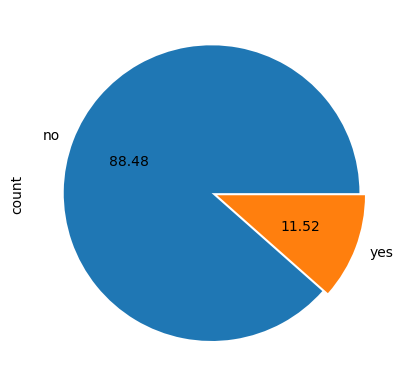

In [10]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

# Data Insights

In [12]:
'''
1. 88.48% people did not subscribe bank term deposite .
2. The Average call duration record is 264 seconds.This can be one of the cause for 
the people who have not subscribed the bank deposite.
3. If the call duration is more than 300 seconds the chances are there that person 
will subscribe the bank term deposite.
4.The Target Audience is Divorced People on call.
5. The people who have taken loan are excluded from the Bank term deposite subscription. 
6. The peole who have housing loan are excluded from then bank term deposite subcription. 
'''
df['duration'].mean()

263.96129174961294

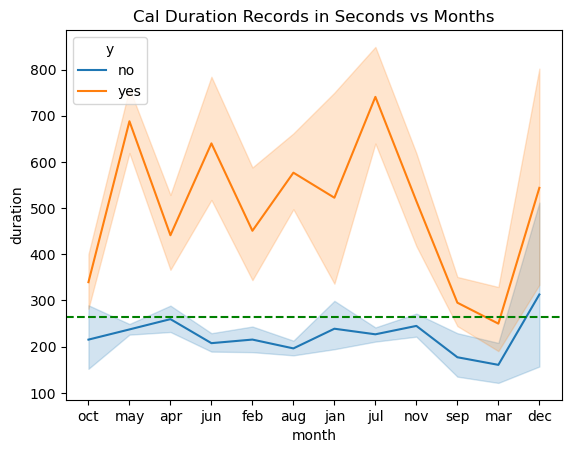

In [13]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['y'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'green')
plt.title('Cal Duration Records in Seconds vs Months')
plt.show()

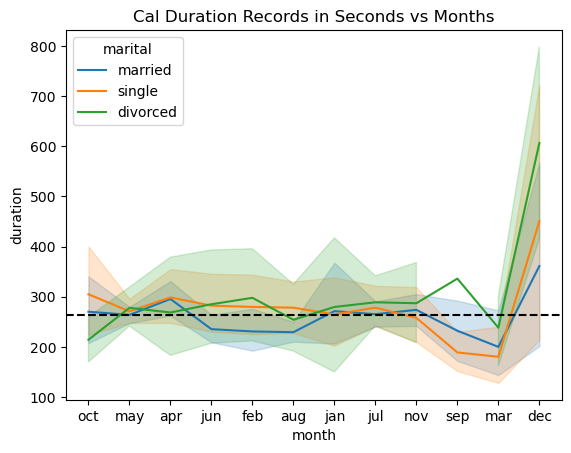

In [14]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['marital'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'black')
plt.title('Cal Duration Records in Seconds vs Months')
plt.show()

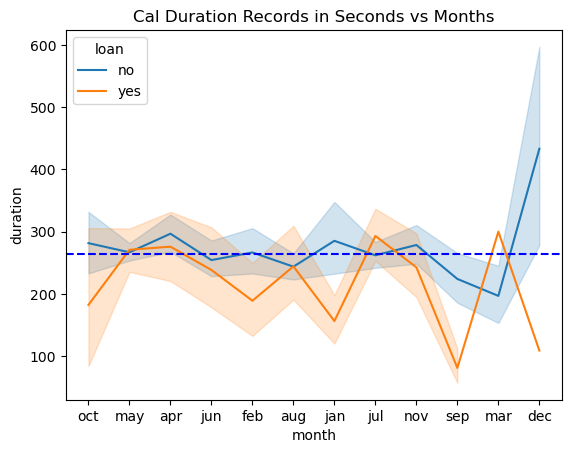

In [15]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['loan'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'b')
plt.title('Cal Duration Records in Seconds vs Months')
plt.show()

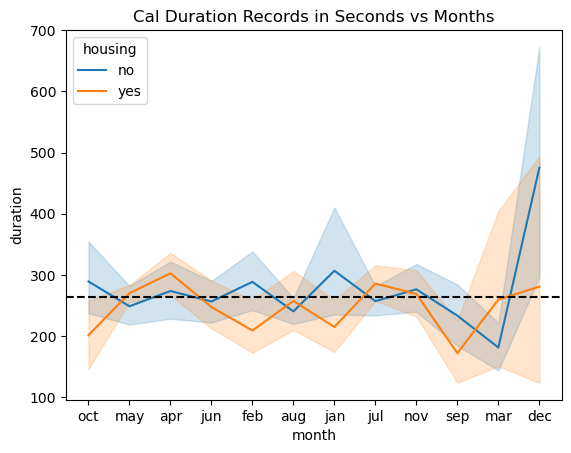

In [16]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['housing'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'black')
plt.title('Cal Duration Records in Seconds vs Months')
plt.show()

In [17]:
df['job'].value_counts()


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

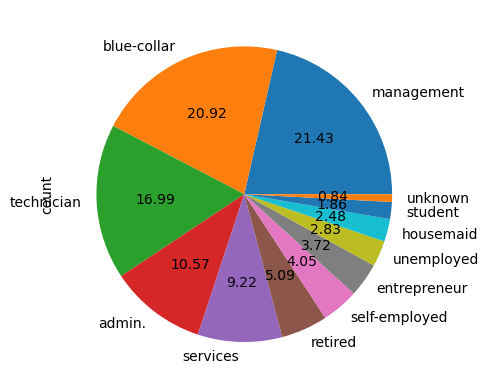

In [18]:
#Distribution based on jobs
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

In [19]:
 management = df[df['job'] == 'management']
bluecollar = df[df['job'] == 'blue-collar']

In [20]:
management

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
20,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,38,management,married,tertiary,no,3436,no,no,cellular,21,nov,663,4,-1,0,unknown,yes
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
4495,48,management,married,tertiary,no,1175,yes,no,telephone,18,nov,1476,3,-1,0,unknown,no
4498,31,management,married,tertiary,no,1183,yes,no,unknown,27,may,676,6,-1,0,unknown,no


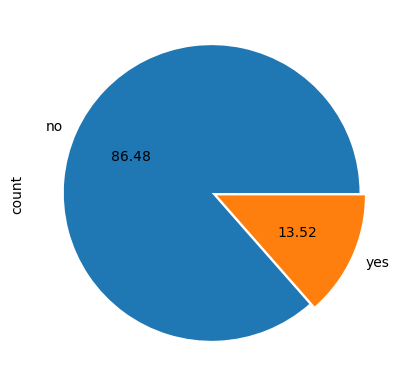

In [21]:
management['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02])
plt.show()

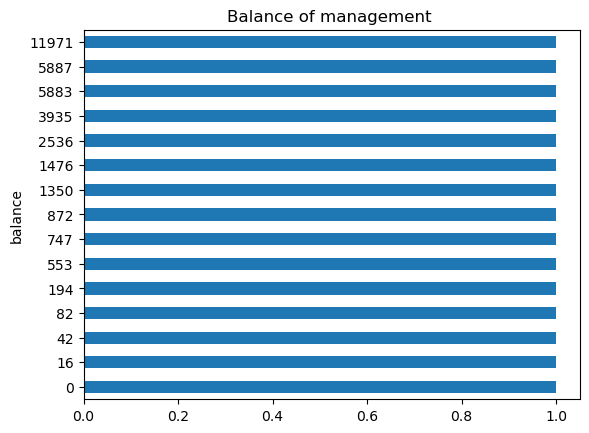

In [22]:
 management['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')
plt.title('Balance of management ')
plt.show()

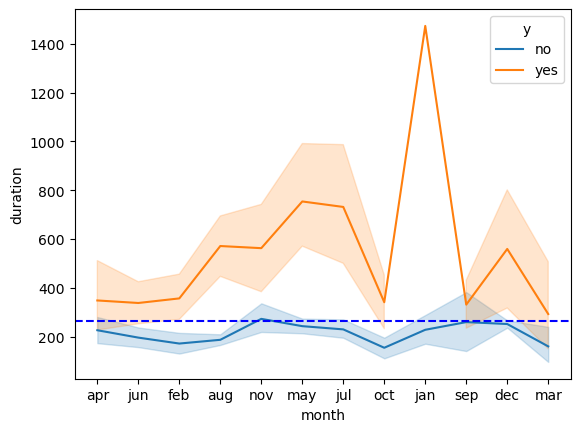

In [23]:
sns.lineplot(x = management['month'],y = management['duration'],hue = management['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [24]:
bluecollar = df[df['job'] == 'blue-collar']

In [25]:
bluecollar

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
26,55,blue-collar,married,primary,no,627,yes,no,unknown,5,may,247,1,-1,0,unknown,no
37,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no


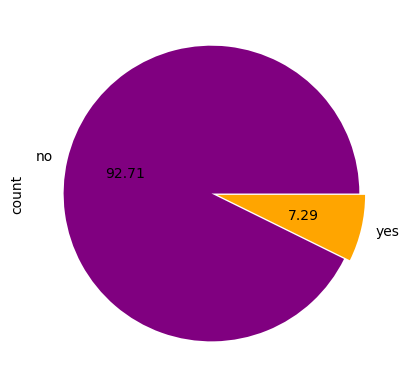

In [26]:
bluecollar['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors = ['purple','orange'])
plt.show()

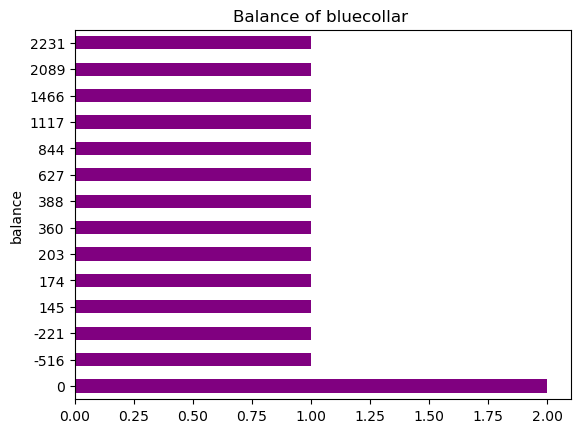

In [27]:
bluecollar['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color = 'purple')
plt.title('Balance of bluecollar ')
plt.show()

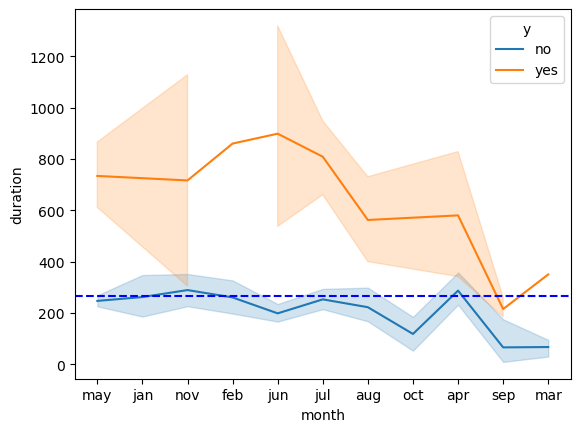

In [28]:
sns.lineplot(x = bluecollar['month'],y = bluecollar['duration'],hue = bluecollar['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [29]:
Admin = df[df['job'] == 'admin.']

In [30]:
Admin

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no
17,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
29,53,admin.,married,secondary,no,105,no,yes,cellular,21,aug,74,2,-1,0,unknown,no
35,42,admin.,divorced,secondary,no,1811,yes,no,unknown,14,may,150,1,-1,0,unknown,no
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,46,admin.,married,secondary,no,466,yes,no,cellular,29,jan,169,1,-1,0,unknown,no
4490,58,admin.,married,secondary,no,3496,yes,no,unknown,2,jun,111,4,-1,0,unknown,no
4500,38,admin.,married,secondary,no,4196,yes,no,cellular,12,may,193,2,-1,0,unknown,no
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


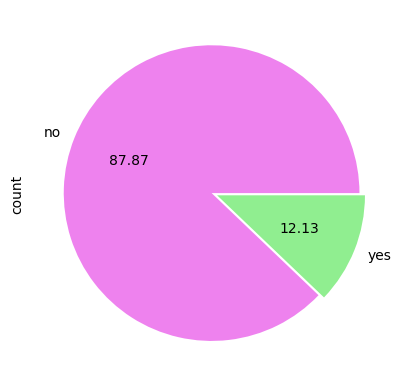

In [31]:
Admin['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors=['violet', 'lightgreen'])
plt.show()

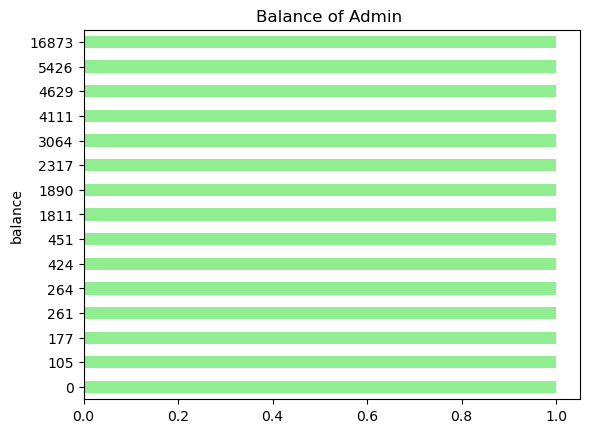

In [32]:
Admin['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color ='lightgreen')
plt.title('Balance of Admin ')
plt.show()

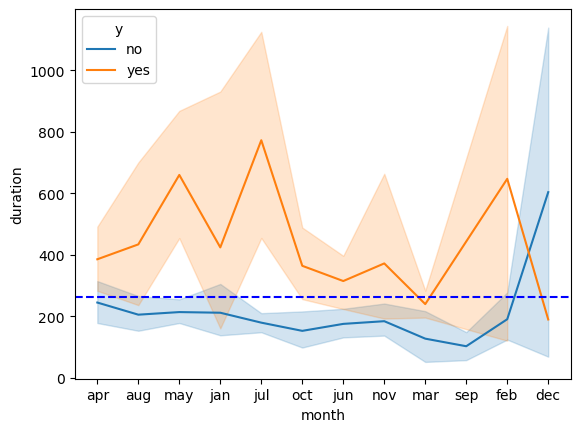

In [33]:
sns.lineplot(x = Admin['month'],y = Admin['duration'],hue = Admin['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [34]:
Technician = df[df['job'] == 'technician']

In [35]:
Technician

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
31,31,technician,married,secondary,no,171,no,no,cellular,27,aug,81,3,-1,0,unknown,no
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,28,technician,single,tertiary,no,0,yes,no,unknown,4,jun,205,6,-1,0,unknown,no
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4509,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no
4510,36,technician,divorced,secondary,no,566,yes,no,unknown,20,may,129,2,-1,0,unknown,no


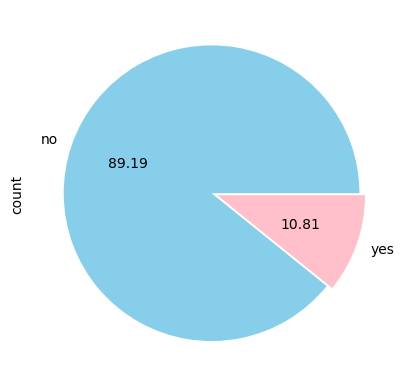

In [36]:
Technician['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors=['skyblue', 'pink'])
plt.show()

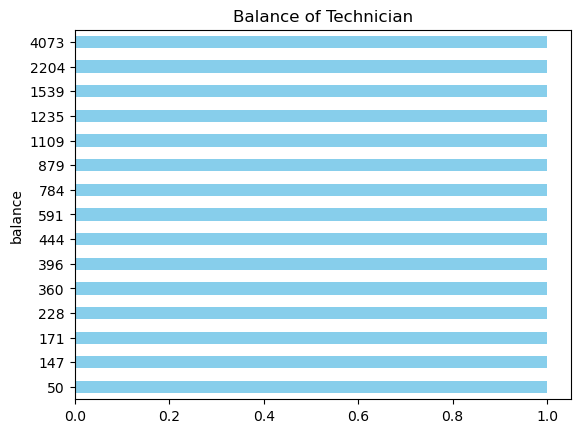

In [37]:
Technician['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color ='skyblue')
plt.title('Balance of Technician')
plt.show()

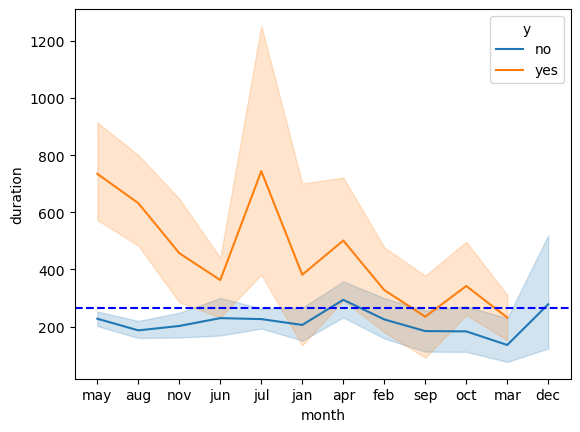

In [38]:
sns.lineplot(x = Technician['month'],y = Technician['duration'],hue = Technician['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()